Found 4600 images belonging to 3 classes.
Found 4600 images belonging to 3 classes.
Epoch 1/10
143/143 [==============================] - 207s 1s/step - loss: 0.6425 - accuracy: 0.2673 - val_loss: 0.5604 - val_accuracy: 0.2502
Epoch 2/10
143/143 [==============================] - 210s 1s/step - loss: 0.5656 - accuracy: 0.2769 - val_loss: 0.5066 - val_accuracy: 0.3575
Epoch 3/10
143/143 [==============================] - 210s 1s/step - loss: 0.5026 - accuracy: 0.3161 - val_loss: 0.4148 - val_accuracy: 0.3608
Epoch 4/10
143/143 [==============================] - 210s 1s/step - loss: 0.4519 - accuracy: 0.3531 - val_loss: 0.3773 - val_accuracy: 0.3903
Epoch 5/10
143/143 [==============================] - 209s 1s/step - loss: 0.4299 - accuracy: 0.3643 - val_loss: 0.3790 - val_accuracy: 0.3536
Epoch 6/10
143/143 [==============================] - 215s 2s/step - loss: 0.3914 - accuracy: 0.3831 - val_loss: 0.3159 - val_accuracy: 0.3988
Epoch 7/10
143/143 [==============================] - 208s

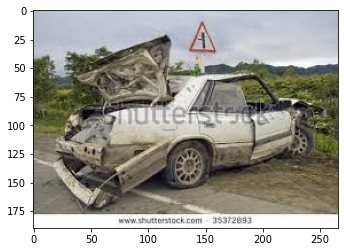

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Set up the data generators
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '../dataset'
valid_dir = '../dataset'

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

valid_generator = valid_datagen.flow_from_directory(
        valid_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary')

# Define the model architecture
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Set up callbacks
callbacks = [
    EarlyStopping(patience=3),
    ModelCheckpoint('vehicle_damage_detector.h5', save_best_only=True)
]

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.samples//train_generator.batch_size,
      epochs=10,
      validation_data=valid_generator,
      validation_steps=valid_generator.samples//valid_generator.batch_size,
      callbacks=callbacks)

# Load the saved model for testing
model = tf.keras.models.load_model('vehicle_damage_detector.h5')

# Load the test image and preprocess it
img = cv2.imread('../0008.jpeg')
img = cv2.resize(img, (224,224))
img = np.expand_dims(img, axis=0)
img = img/255.0

# Make a prediction on the test image
pred = model.predict(img)

# Print the predicted label (0 for not damaged, 1 for damaged)
if pred > 0.5:
    print('The vehicle in the image is damaged.')
else:
    print('The vehicle in the image is not damaged.')

# Display the test image
plt.imshow(cv2.cvtColor(cv2.imread('../0008.jpeg'), cv2.COLOR_BGR2RGB))
plt.show()
